In [69]:
# 라이브러리 로딩

from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# -----------------------------(bmi, outcome 때서 bmi 예측)
# 1) 데이터 준비(당뇨병 데이터)
# -----------------------------

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/기계학습프로그래밍/5주/diabetes.csv").dropna()

print(df)

# BMI, outcome 땜
X = df.drop(columns=["BMI", "Outcome"])
y = df['BMI']

print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

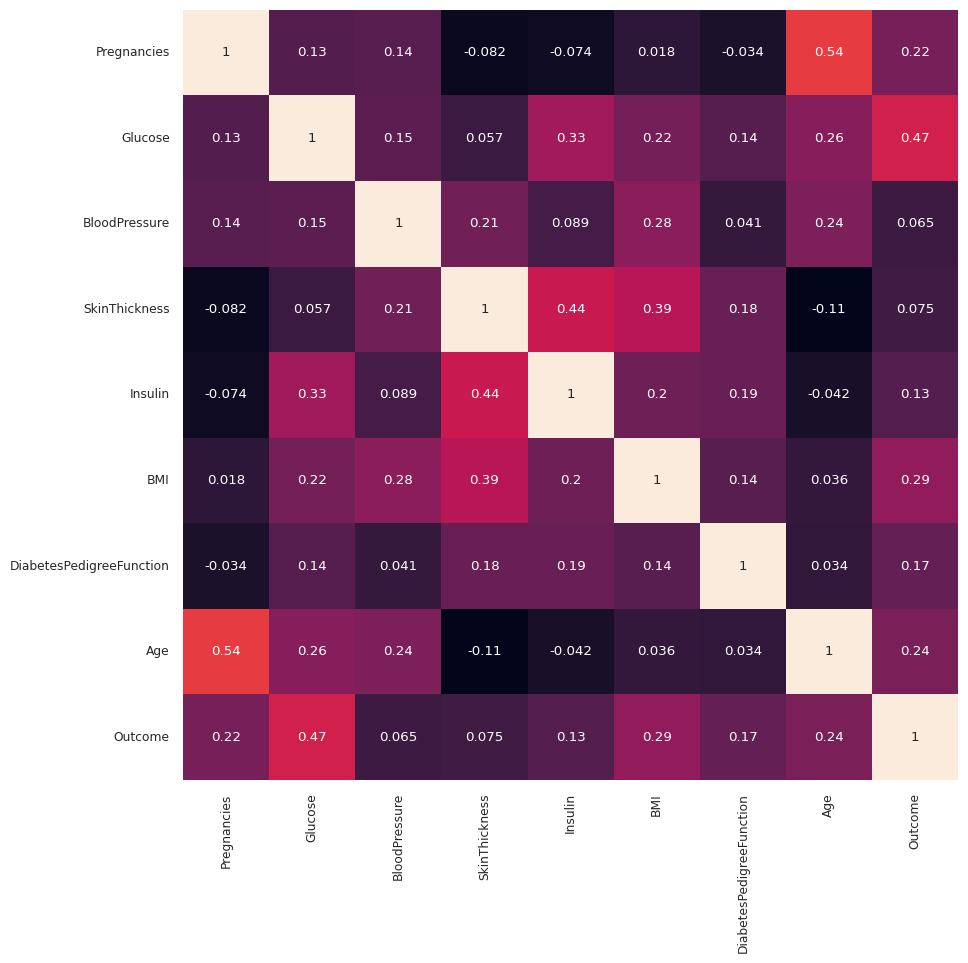

In [71]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [72]:
# 스케일링 (얘들이 다 연속적인 값이라 one hot 인코딩 불가. 걍 바로 사용)

Y = y.values
print(Y)

[33.6 26.6 23.3 28.1 43.1 25.6 31.  35.3 30.5  0.  37.6 38.  27.1 30.1
 25.8 30.  45.8 29.6 43.3 34.6 39.3 35.4 39.8 29.  36.6 31.1 39.4 23.2
 22.2 34.1 36.  31.6 24.8 19.9 27.6 24.  33.2 32.9 38.2 37.1 34.  40.2
 22.7 45.4 27.4 42.  29.7 28.  39.1  0.  19.4 24.2 24.4 33.7 34.7 23.
 37.7 46.8 40.5 41.5  0.  32.9 25.  25.4 32.8 29.  32.5 42.7 19.6 28.9
 32.9 28.6 43.4 35.1 32.  24.7 32.6 37.7 43.2 25.  22.4  0.  29.3 24.6
 48.8 32.4 36.6 38.5 37.1 26.5 19.1 32.  46.7 23.8 24.7 33.9 31.6 20.4
 28.7 49.7 39.  26.1 22.5 26.6 39.6 28.7 22.4 29.5 34.3 37.4 33.3 34.
 31.2 34.  30.5 31.2 34.  33.7 28.2 23.2 53.2 34.2 33.6 26.8 33.3 55.
 42.9 33.3 34.5 27.9 29.7 33.3 34.5 38.3 21.1 33.8 30.8 28.7 31.2 36.9
 21.1 39.5 32.5 32.4 32.8  0.  32.8 30.5 33.7 27.3 37.4 21.9 34.3 40.6
 47.9 50.  24.6 25.2 29.  40.9 29.7 37.2 44.2 29.7 31.6 29.9 32.5 29.6
 31.9 28.4 30.8 35.4 28.9 43.5 29.7 32.7 31.2 67.1 45.  39.1 23.2 34.9
 27.7 26.8 27.6 35.9 30.1 32.  27.9 31.6 22.6 33.1 30.4 52.3 24.4 39.4
 24.3 22.

In [73]:
# 학습/테스트 분할

X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [74]:
# 모델 구성 (이건 단순 회귀 문제이므로 출력층은 하나)

model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # 특성 수
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # 출력층 linear, 예측값 1개
])

In [75]:
# 모델 컴파일 (회귀 문제이므로 컴파일도 MSE로)

model.compile(
    optimizer='rmsprop',
    loss='mse',
    metrics=['mse']
)

In [76]:
# 학습 (epoch 수 알아서 조절)

N_EPOCHS = 50

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1086.1611 - mse: 1086.1611 - val_loss: 77.6836 - val_mse: 77.6836
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 76.4838 - mse: 76.4838 - val_loss: 68.1049 - val_mse: 68.1049
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 57.6229 - mse: 57.6229 - val_loss: 61.1288 - val_mse: 61.1288
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 62.9781 - mse: 62.9781 - val_loss: 73.9651 - val_mse: 73.9651
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 57.8589 - mse: 57.8589 - val_loss: 88.4643 - val_mse: 88.4643
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 58.6328 - mse: 58.6328 - val_loss: 61.5896 - val_mse: 61.5896
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 50.9261 - mse: 50.9261 - val_loss: 90.0369 - val_mse: 90.0369
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 67.9123 - mse: 67.9123 - val_loss: 55.8750 - val_mse: 55.8750
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━

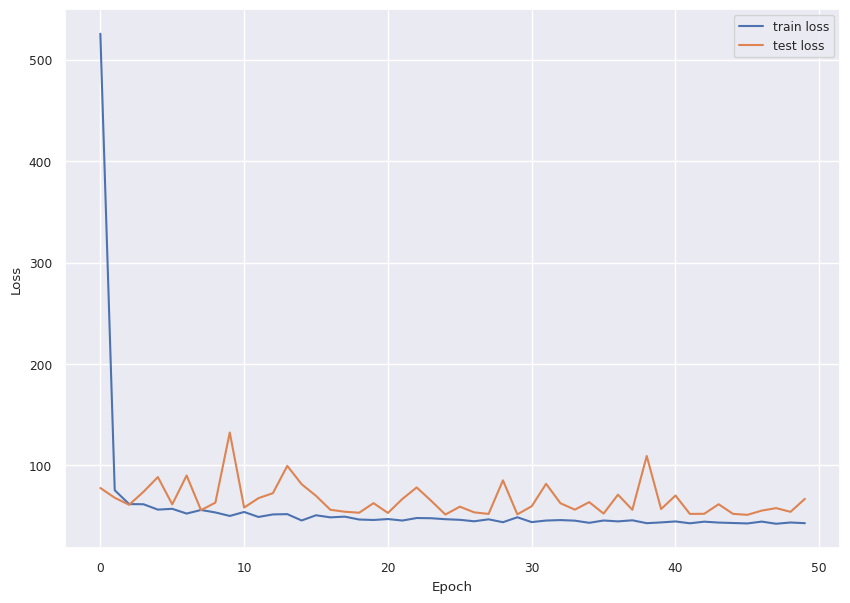

In [77]:
# loss 체크

import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [78]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 64.7582 - mse: 64.7582 


[67.01736450195312, 67.01736450195312]